# Лабораторная работа №6. Сэмплирование (генерация случайных величин)

Для своей функции распределения (нормированная непрерывная функция: интеграл от -бесконечности до +бесконечности = 1) просэмплировать через два метода, реализованных самостоятельно:
- Выборка отклонения
- Метод Метрополиса-Гастингса

In [69]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

### Выбранная функция

Логарифмически нормальное распределение

$ f(x) = \frac{1}{x\delta\sqrt{2\pi}}\exp\left(-\frac{(ln(x)-a)^2}{2\delta^2}\right)$, x > 0

In [74]:
def log_norm(x, delta = 1, a = 2):
    return math.exp(-((np.log(x) - a) ** 2) / (2 * (delta ** 2))) / (x * delta * math.sqrt(2 * math.pi))

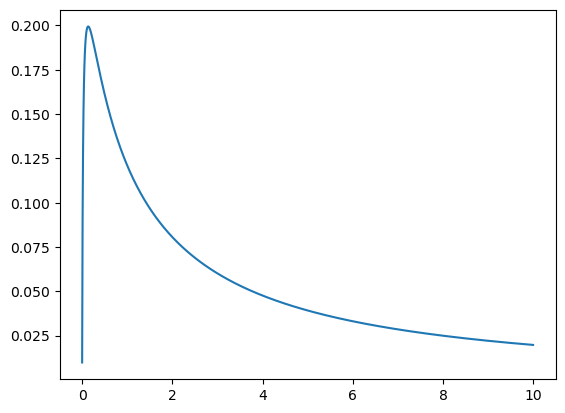

In [76]:
x = np.arange(0.001, 10, 0.01)
y = np.array([log_norm(xx, 2, 2) for xx in x])
plt.plot(x, y)
plt.show()

### Выборка отклонения

1) Выбираем рандомную точку от 0 до cq(x), где cq(x) - вспомогательное распределение которое умеем сэмплировать (нормальное)
2) Если эта точка ниже сэмплируемой функции, берем её

In [72]:
#плотность нормального распределения
def norm_distribution(x, delta = 4, mu = 4):
    return math.exp(-(((x - mu) / delta)** 2) / 2) / (delta * math.sqrt(2 * math.pi))

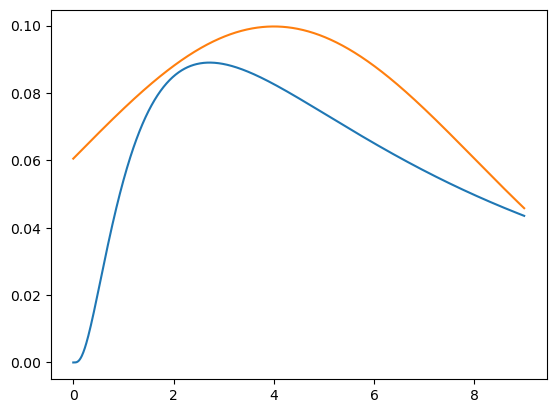

In [78]:
x = np.arange(0.001, 9, 0.01)
y = np.array([log_norm(xx, 1, 2) for xx in x])
y_norm = np.array([norm_distribution(xx, 4, 4) for xx in x])
plt.plot(x, y)
plt.plot(x, y_norm) #оранжевым
plt.show()

In [260]:
def rejection_sample(n, a, b, f_sample, f_base):
    points = []
    while len(points) < n:
        '''
        x = np.random.normal(a, b)
        while x < a or x > b:
            x = np.random.normal(a, b)
        u = np.random.normal()
        while u < 0 or u > f_base(x):
            u = np.random.normal(0, f_base(x))
        '''
        x = random.normalvariate(4, 4)
        while x < a or x > b:
            x = random.normalvariate(4, 4)
        u = random.normalvariate(4, 4)
        while u < 0 or u > f_base(x):
            u = random.normalvariate(4, 4)
        if u < f_sample(x):
            points.append([x, u])
    return points

In [261]:
sampled_points = rejection_sample(1000, 0.001, 9, log_norm, norm_distribution)

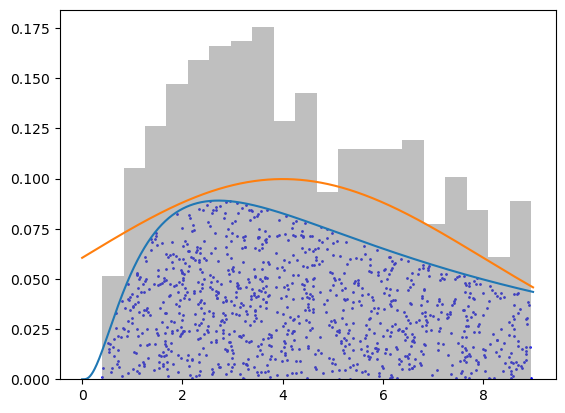

In [263]:
x = np.arange(0.001, 9, 0.01)
y = np.array([log_norm(xx, 1, 2) for xx in x])
y_norm = np.array([norm_distribution(xx, 4, 4) for xx in x])
plt.plot(x, y)
plt.plot(x, y_norm) #оранжевым

all_x = [p[0] for p in sampled_points]
all_y = [p[1] for p in sampled_points]
plt.scatter(all_x, all_y, s=1,color = "blue")
plt.hist(all_x, 20, density=True, color="grey", alpha = 0.5)
plt.show()

### Метод Метрополиса-Гастингса

моя реализация

In [291]:
def metropolis_hasting(n, a, b, x0, f_sample, f_base):
    points = [x0]
    x_prev = x0
    while len(points) < n:
        step = np.random.normal()
        x_next = x_prev + step
        while x_next < a or x_next > b:
            step = np.random.normal() #random.normalvariate(4, 4)
            x_next = x_prev + step
        print("f_sample(x_next)", f_sample(x_next))
        print("f_sample(x_prev)", f_sample(x_prev), "\n")
        a1 = f_sample(x_next) / f_sample(x_prev)
        a2 = f_base(x_next) / f_base(x_prev)
        a = a1 * a2
        print(a)
        if a >= 1:
            x_prev = x_next
        else:
            if a >= 1 - a:
                points.append(x_next)
                x_prev = x_next
            else:
                points.append(x_prev)
    return points

In [292]:
sampled_points = metropolis_hasting(100, 0.001, 9, 0.001, log_norm, norm_distribution)

f_sample(x_next) 0.04324515034943353
f_sample(x_prev) 2.347946427716254e-15 

22121887881051.074


KeyboardInterrupt: 

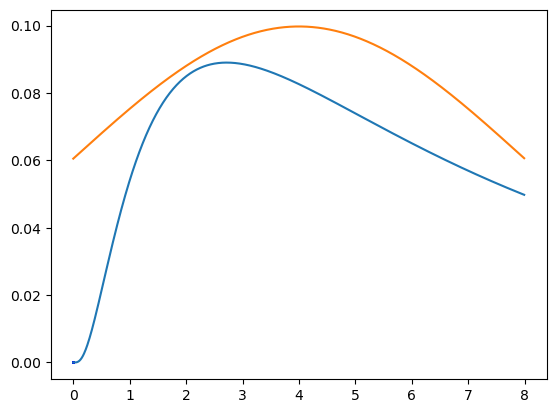

In [286]:
x = np.arange(0.001, 8, 0.01)
y = np.array([log_norm(xx, 1, 2) for xx in x])
y_norm = np.array([norm_distribution(xx, 4, 4) for xx in x])
plt.plot(x, y)
plt.plot(x, y_norm) #оранжевым

plt.scatter(sampled_points, np.zeros_like(sampled_points), s=1,color = "blue")
#plt.hist(sampled_points, 30, density=True, color="grey", alpha = 0.5)
plt.show()

найденная реализация

In [294]:
def Metropolis_Hastings(func, start: np.ndarray, count: int):

    x=[start]

    while len(x) < count:
        
        x_prev = x[-1]
        x_next = np.random.normal(x_prev)
        
        ratio = func(x_next) / func(x_prev)

        if np.random.rand() < ratio:
            x.append(x_next)
        else:
            x.append(x_prev)

    return x

In [296]:
sampled_points = Metropolis_Hastings(log_norm, 0.001, 100)

/var/folders/x4/7f4hrz657630_vzq5rhyrmbw0000gp/T/ipykernel_96183/3600725968.py:2: RuntimeWarning: invalid value encountered in log
  return math.exp(-((np.log(x) - a) ** 2) / (2 * (delta ** 2))) / (x * delta * math.sqrt(2 * math.pi))


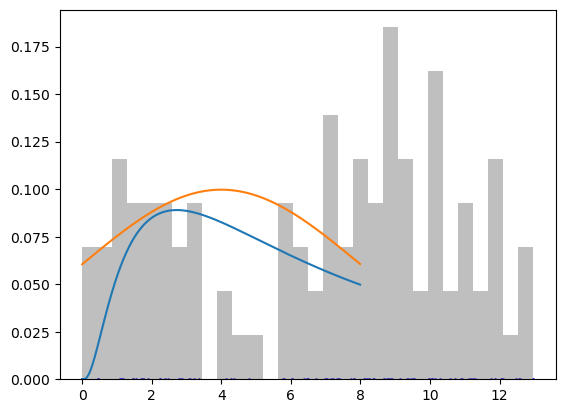

In [298]:
x = np.arange(0.001, 8, 0.01)
y = np.array([log_norm(xx, 1, 2) for xx in x])
y_norm = np.array([norm_distribution(xx, 4, 4) for xx in x])
plt.plot(x, y)
plt.plot(x, y_norm) #оранжевым

plt.scatter(sampled_points, np.zeros_like(sampled_points), s=1,color = "blue")
plt.hist(sampled_points, 30, density=True, color="grey", alpha = 0.5)
plt.show()